# DBSCAN Lab
In this notebook, we will use DBSCAN to cluster a couple of data sets. We will examine how changing its parameters (epsilon and min_samples) changes the resulting cluster structure.

**Task 1:** Import *"pandas"* library and read the csv file *"Blobs.csv"*

In [2]:
#write code here
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/Blobs.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to the user
df.head()



,0,1
0,8.622185,1.935796
1,-4.736710,-7.970958
2,9.621222,0.925423
3,6.162095,-0.273254
4,8.697488,-1.057452


In [3]:
dataset_1= df.values

This our first dataset. It looks like this:

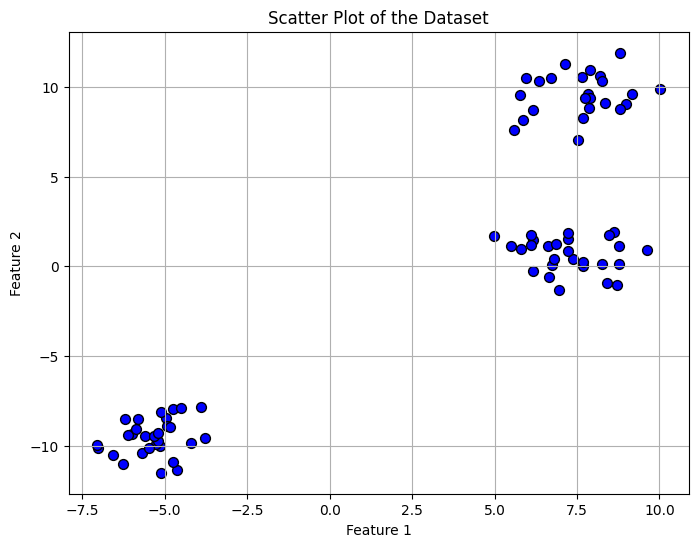

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the dataset
def plot_dataset(dataset):
    plt.figure(figsize=(8,6))
    plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c='blue', s=50, edgecolor='k')
    plt.title("Scatter Plot of the Dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()
plot_dataset(df)

Let's cluster it using DBSCAN's default settings and see what happens. We are hoping for it to be able to assign each of the three "blobs" into its own cluster. Can it do that out of the box?

**Task 2:** Do the following tasks:
<br/>a) Import sklearn's cluster module
<br/>b) Create an instance of DBSCAN
<br/>c) Use DBSCAN's fit_predict to return clustering labels for dataset_1

In [8]:
#Write code for task a

from sklearn.cluster import DBSCAN

#Write code for task b
dbscan = DBSCAN(eps=0.5, min_samples=5)


#Write code for task c
clustering_labels = dbscan.fit_predict(df)


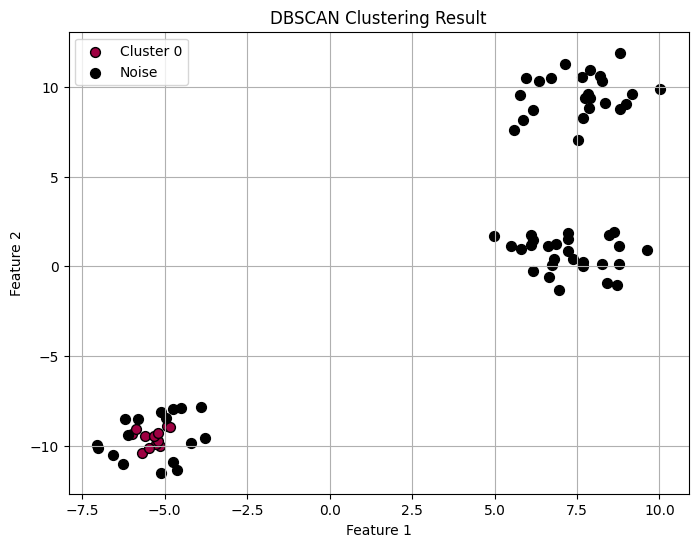

In [10]:
# Plot clustering
import matplotlib.pyplot as plt

# Function to plot clustered data
def plot_clustered_dataset(dataset, labels):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)

    # Assign a color to each cluster
    for label in unique_labels:
        # Noise points (label = -1) are plotted in black
        if label == -1:
            color = 'k'
            label_name = 'Noise'
        else:
            color = plt.cm.Spectral(float(label) / len(unique_labels))
            label_name = f'Cluster {label}'

        # Plot the points for the current label
        plt.scatter(dataset[labels == label, 0], dataset[labels == label, 1],
                    c=[color], label=label_name, s=50, edgecolor='k')

    plt.title("DBSCAN Clustering Result")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Convert dataframe to numpy array for plotting
dataset_1 = df.to_numpy()

# Call the function to plot the clustered dataset
plot_clustered_dataset(dataset_1, clustering_labels)


Does that look okay? Was it able to group the dataset into the three clusters we were hoping for?

As you see, we will have to make some tweaks. Let's start by looking at Epsilon, the radius of each point's neighborhood. The default value in sklearn is 0.5.

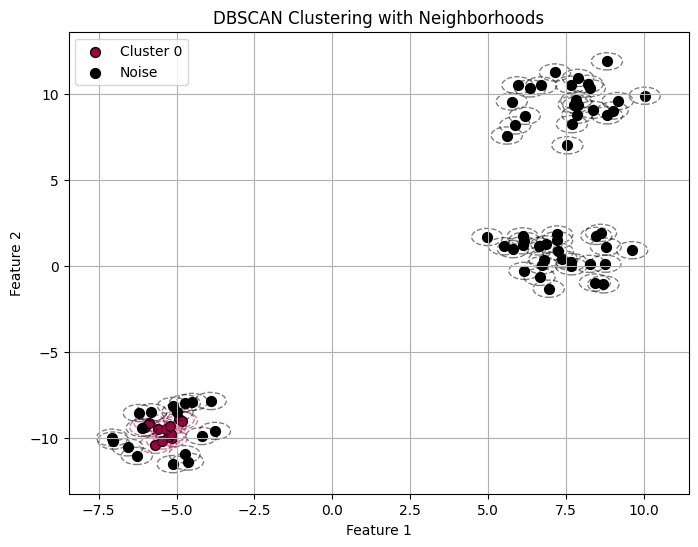

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Function to plot clustered data with neighborhoods
def plot_clustered_dataset_with_neighborhoods(dataset, labels, eps):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)

    # Plot each cluster with a different color
    for label in unique_labels:
        if label == -1:
            color = 'k'  # Noise points are black
            label_name = 'Noise'
        else:
            color = plt.cm.Spectral(float(label) / len(unique_labels))
            label_name = f'Cluster {label}'

        # Plot the points for the current cluster
        cluster_points = dataset[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label_name, s=50, edgecolor='k')

        # Plot neighborhoods for core points
        for point in cluster_points:
            circle = Circle(point, eps, color=color, fill=False, linestyle='--', alpha=0.5)
            plt.gca().add_patch(circle)

    plt.title("DBSCAN Clustering with Neighborhoods")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Convert dataframe to numpy array for plotting
dataset_1 = df.to_numpy()

# Define the epsilon (eps) value used in DBSCAN
eps = 0.5  # Adjust this if necessary based on your DBSCAN parameters

# Call the function to plot clustered dataset with neighborhoods
plot_clustered_dataset_with_neighborhoods(dataset_1, clustering_labels, eps)


From the graph, we can see that an Epsilon value of 0.5 is too small for this dataset. We need to increase it so the points in a blob overlap each others' neighborhoods, but not to the degree where a single cluster would span two blobs.

**Task 3:** Change the value of Epsilon so that each blob is its own cluster (without any noise points). The graph shows  the points in the datasets as well as the neighborhood of each point:

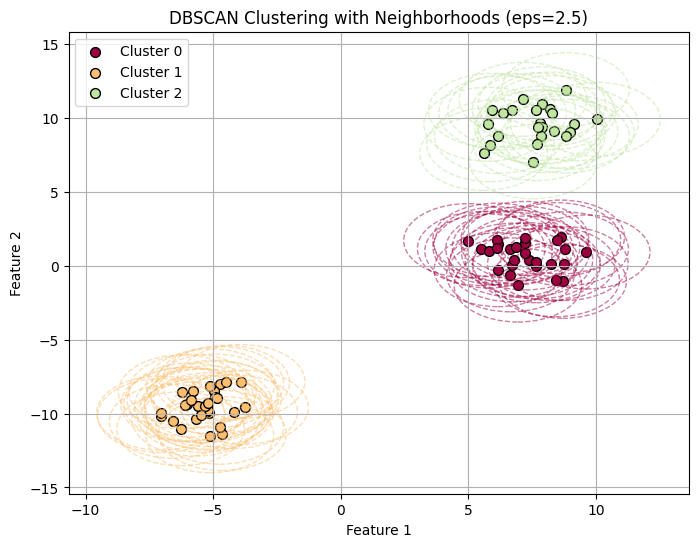

In [17]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Function to plot clustered data with neighborhoods
def plot_clustered_dataset_with_neighborhoods(dataset, labels, eps):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)

    # Plot each cluster with a different color
    for label in unique_labels:
        if label == -1:
            color = 'k'  # Noise points are black
            label_name = 'Noise'
        else:
            color = plt.cm.Spectral(float(label) / len(unique_labels))
            label_name = f'Cluster {label}'

        # Plot the points for the current cluster
        cluster_points = dataset[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label_name, s=50, edgecolor='k')

        # Plot neighborhoods for core points
        for point in cluster_points:
            circle = Circle(point, eps, color=color, fill=False, linestyle='--', alpha=0.5)
            plt.gca().add_patch(circle)

    plt.title(f"DBSCAN Clustering with Neighborhoods (eps={eps})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Convert dataframe to numpy array for plotting
dataset_1 = df.to_numpy()

# Try different values of epsilon (eps) to avoid noise points and separate clusters properly
eps = 2.5  # Change this value and test until you find the right eps value

# Create an instance of DBSCAN with the new eps value
dbscan = DBSCAN(eps=eps, min_samples=5)

# Fit DBSCAN to the dataset and get the clustering labels
clustering_labels = dbscan.fit_predict(dataset_1)

# Call the function to plot clustered dataset with neighborhoods
plot_clustered_dataset_with_neighborhoods(dataset_1, clustering_labels, eps)


Were you able to do it? As you change the values, you can see that the points cluster into larger clusters and the number of noise points keeps on decreasing. Then at Epsilon values above 1.6 we get the clustering we're after. But once we increase it to above 5, we start to see two blobs joining together into one cluster. So the right Epsilon would be in the range between those values in this scenario.

## Dataset 2

Let's now look at a dataset that's a little more tricky

**Task 4:** Import the csv file *"Varied.csv"*

In [19]:
#Write code here
# Import the CSV file "Varied.csv"
file_path_varied = '/content/Varied.csv'

# Load the CSV file into a pandas DataFrame
df_varied = pd.read_csv(file_path_varied)

# Display the first few rows of the dataset to the user
df_varied.head()


,0,1
0,-7.496770,-4.795778
1,-9.876978,-6.828510
2,2.209805,0.316721
3,1.820086,0.265529
4,-9.256011,-5.956185


In [20]:
dataset_2= df_varied.values

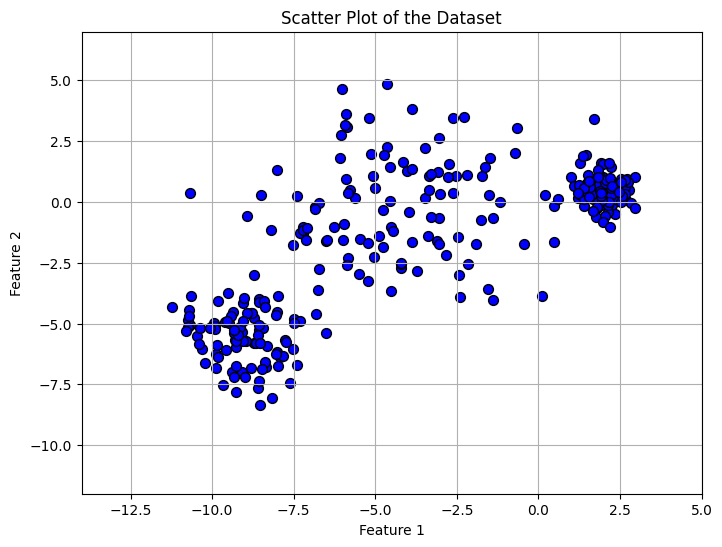

In [22]:
import matplotlib.pyplot as plt

# Function to plot the dataset
def plot_dataset(dataset, xlim=None, ylim=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset[:, 0], dataset[:, 1], c='blue', s=50, edgecolor='k')

    # Set the x and y limits if provided
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)

    plt.title("Scatter Plot of the Dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Convert the varied dataset to a numpy array for plotting
dataset_2 = df_varied.to_numpy()

# Plot the dataset with the specified x and y limits
plot_dataset(dataset_2, xlim=(-14, 5), ylim=(-12, 7))


What happens if we run DBSCAN with the default parameter values?

**Task 5:** Do the following tasks:
<br/>a) Create an instance of DBSCAN
<br/>b) Use DBSCAN's fit_predict to return clustering labels for dataset_2

In [23]:
# Ensure the dataset_2 is defined correctly
dataset_2 = df_varied.to_numpy()

# a) Create an instance of DBSCAN
dbscan_varied = DBSCAN(eps=0.5, min_samples=5)

# b) Use DBSCAN's fit_predict to return clustering labels for dataset_2
clustering_labels_varied = dbscan_varied.fit_predict(dataset_2)

# Display the clustering labels
clustering_labels_varied


array([-1,  1,  0,  0,  1,  0,  0, -1, -1,  0,  1, -1, -1, -1,  3, -1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  0,  1, -1,  1, -1,  1,
       -1, -1, -1,  1,  0, -1,  0,  0,  1,  1, -1, -1,  1,  1, -1, -1,  0,
        1,  0,  2,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        1,  0, -1,  0,  0,  1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0,
        0,  1,  1, -1,  0, -1,  0, -1,  1,  0,  1, -1, -1,  1, -1,  1, -1,
        0,  1,  3,  1,  0,  1, -1,  1,  3,  1,  1,  1,  0, -1,  0,  0, -1,
        2,  0, -1,  1,  1,  0,  1,  0,  0, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  0,  1,  0,  0, -1, -1, -1,  0, -1,  1,  1,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,
       -1, -1, -1,  0, -1,  0, -1,  0,  1, -1, -1, -1,  1,  0,  0, -1,  0,
        1,  1,  0,  1,  1, -1,  0,  1, -1, -1,  0, -1, -1,  1,  0,  2,  0,
        1,  1,  0, -1,  1, -1, -1, -1, -1,  3,  1, -1,  0, -1, -1,  1,  1,
        1, -1, -1,  0,  0

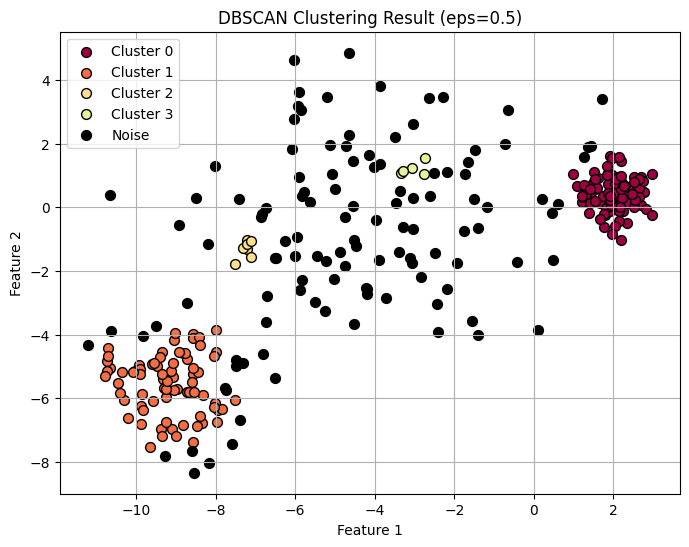

In [24]:
# Plot
# Import necessary plotting library
import matplotlib.pyplot as plt

# Function to plot the clustered dataset with neighborhoods (optional)
def plot_clustered_dataset_with_neighborhoods(dataset, labels, eps):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)

    # Plot each cluster with a different color
    for label in unique_labels:
        if label == -1:
            color = 'k'  # Noise points are black
            label_name = 'Noise'
        else:
            color = plt.cm.Spectral(float(label) / len(unique_labels))
            label_name = f'Cluster {label}'

        # Plot the points for the current cluster
        cluster_points = dataset[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label_name, s=50, edgecolor='k')

    plt.title(f"DBSCAN Clustering Result (eps={eps})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Define epsilon (eps) used in DBSCAN
eps = 0.5

# Call the function to plot clustered dataset
plot_clustered_dataset_with_neighborhoods(dataset_2, clustering_labels_varied, eps)


This clustering could make sense in some scenarios, but it seems rather arbitrary. Looking at the dataset, we can imagine at least two scenarios for what we'd want to do:
 * **Scenario** 1: Break the dataset up into three clusters: the blob on the left, the blob on the right, and the central area (even though it's less dense than the blobs on either side).
 * **Scenario 2**: Break the dataset up into two clusters: the blob on the left, and the blob on the right. Marking all the points in the center as noise.

What values for the DBSCAN parameters would allow us to satisfy each of those senarios? Try a number of parameters to see if you can find a clustering that makes more sense.


**Task 6:** Experiment with different values for eps and min_samples to find a suitable clustering for the dataset.

DBSCAN with eps=0.2, min_samples=3


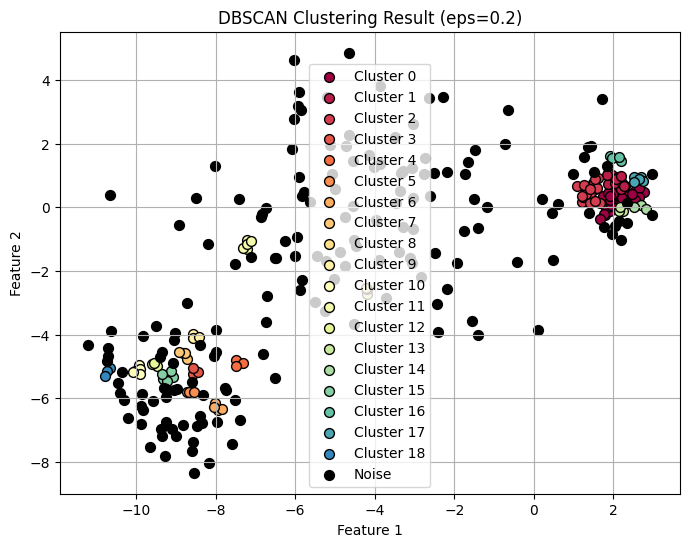

DBSCAN with eps=0.2, min_samples=5


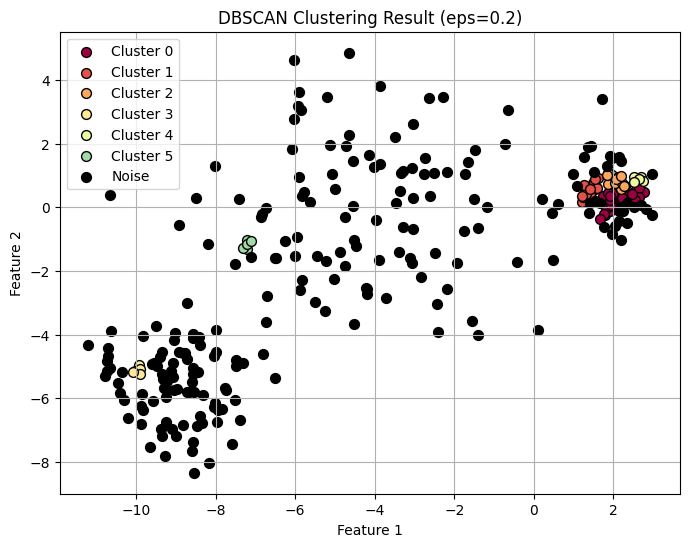

DBSCAN with eps=0.2, min_samples=10


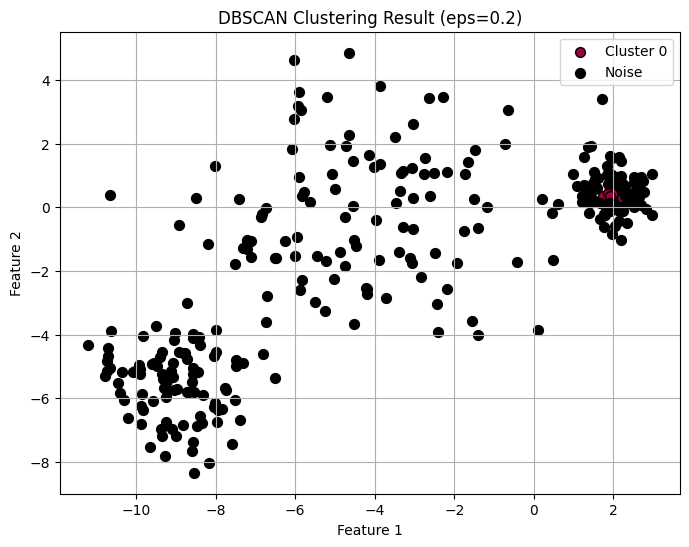

DBSCAN with eps=0.5, min_samples=3


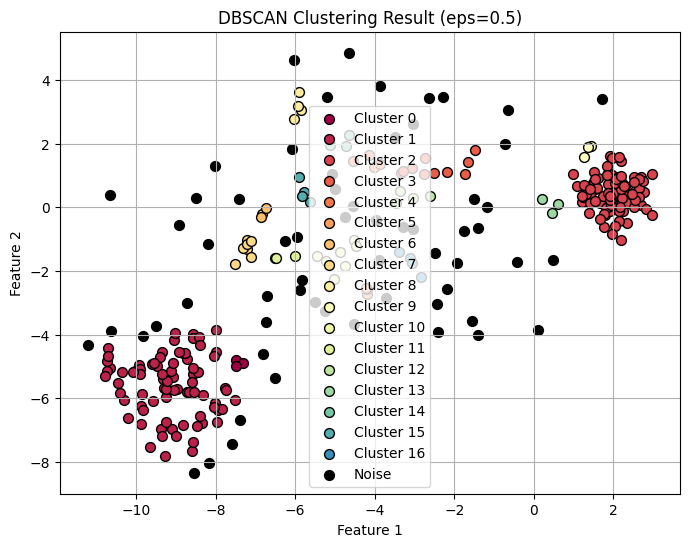

DBSCAN with eps=0.5, min_samples=5


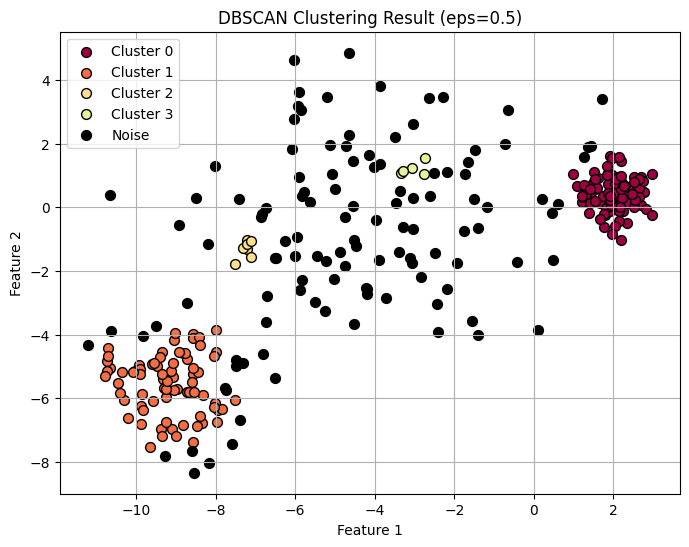

DBSCAN with eps=0.5, min_samples=10


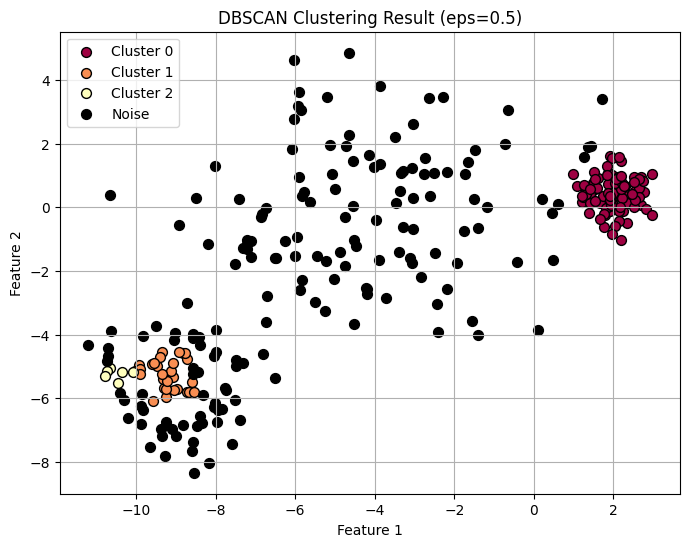

DBSCAN with eps=1.0, min_samples=3


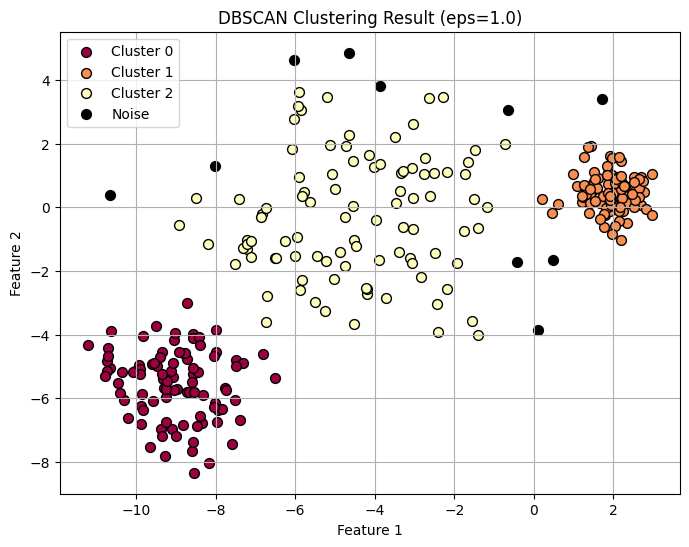

DBSCAN with eps=1.0, min_samples=5


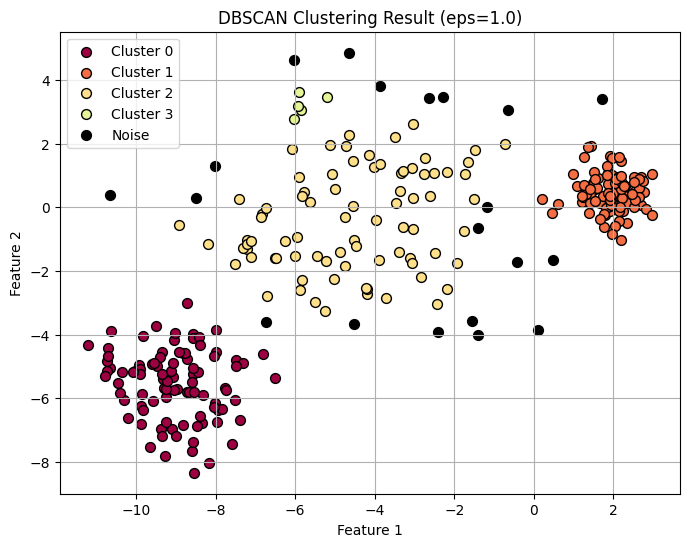

DBSCAN with eps=1.0, min_samples=10


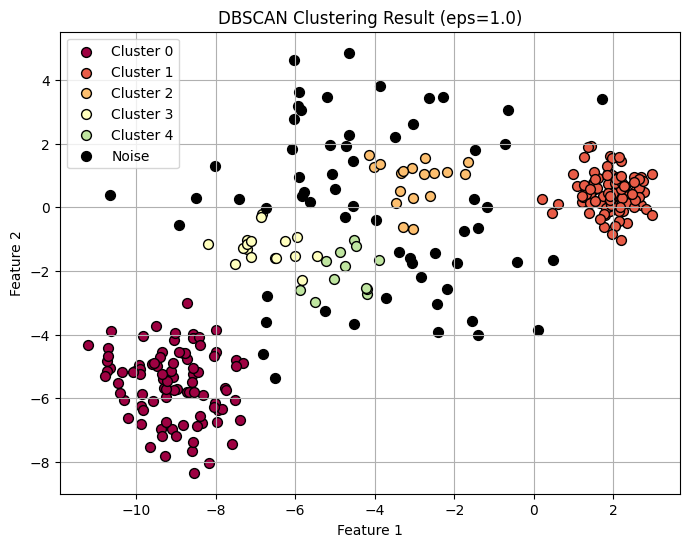

DBSCAN with eps=1.5, min_samples=3


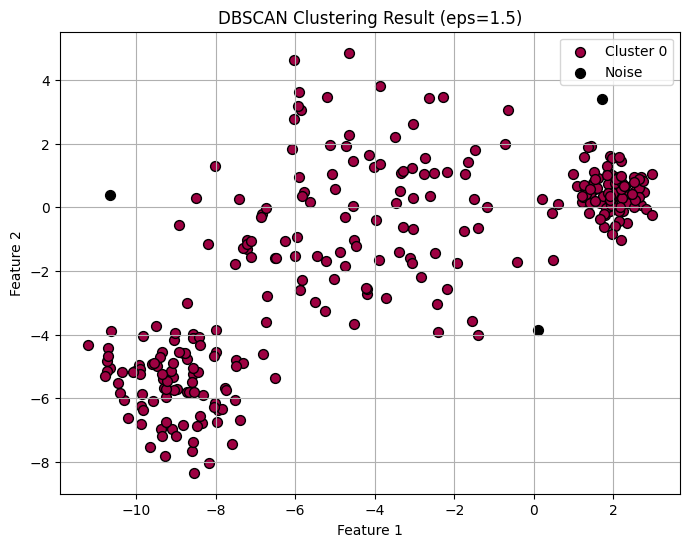

DBSCAN with eps=1.5, min_samples=5


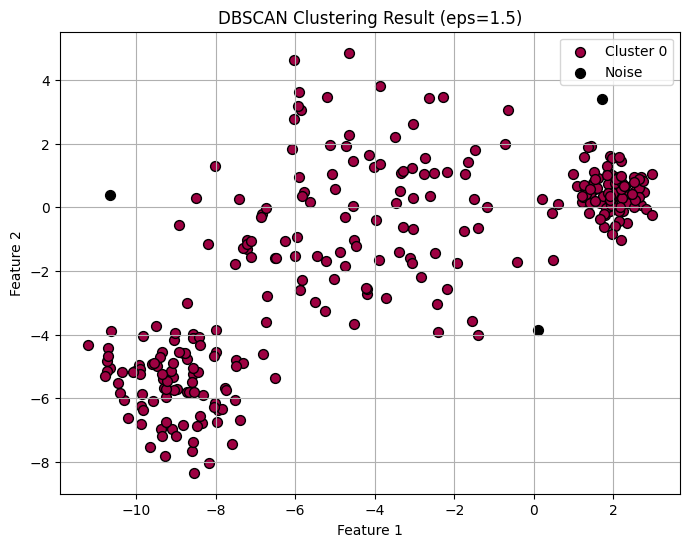

DBSCAN with eps=1.5, min_samples=10


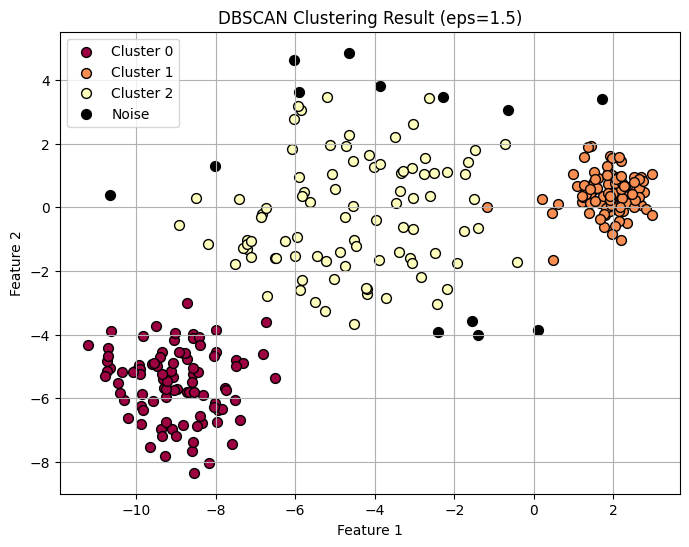

In [26]:
# Function to perform DBSCAN with different parameters and plot results
def experiment_dbscan(dataset, eps, min_samples):
    # Create an instance of DBSCAN with specified eps and min_samples
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit and predict clustering labels
    labels = dbscan.fit_predict(dataset)

    # Plot the results
    plot_clustered_dataset_with_neighborhoods(dataset, labels, eps)

# Experimenting with different values of eps and min_samples
eps_values = [0.2, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 10]

# Loop through different combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"DBSCAN with eps={eps}, min_samples={min_samples}")
        experiment_dbscan(dataset_2, eps, min_samples)



The following grid plots the DBSCAN clustering results of a range of parameter values. Epsilon varies horizontally, while vertically each row shows a different value of min_samples.

## Heuristics for experimenting with DBSCAN's parameters
Looking at this grid, we can guess at some general heuristics for tweaking the parameters of DBSCAN:

<img src='images/low_epsilon_and_low_min_sample.png'><br>Many small clusters. More than anticipated for the dataset. <br>**Action**: increase min_samples and epsilon| <img src='images/high_epsilon_and_low_min_sample.png'><br>Most points belong to one cluster<br>**Action**: decrease epsilon and increase min_samples|
<img src='images/low_epsilon_and_high_min_sample.png'><br>Most/all data points are labeled as noise<br>**Action**: increase epsilon and decrease min_sample <img src='images/high_epsilon_and_high_min_sample.png'><br> Except for extremely dense regions, most/all data points are <br>labeled as noise. (Or all points are labeled as noise). <br>**Action**: decrease min_samples and epsilon.

### Quiz
* Which values do you believe best satisfy scenario 1?
* Which values do you believe best satisfy scenario 2?

### Answers:



Give your answers here:
<br/>1:
<br/>2:

# DBCV

DBCV i.e. Density-Based Clustering Validation is another technique for clustering validation.

## Source

Moulavi, Davoud, et al. "Density-based clustering validation." Proceedings of the 2014 SIAM International Conference on Data Mining. Society for Industrial and Applied Mathematics, 2014.

[Link](https://epubs.siam.org/doi/pdf/10.1137/1.9781611973440.96)

## What is DBCV?

How do you validate clustering assignmnets from unsupervised learning algorithms? A common method is the Silhoette Method, which provides an objective score between -1 and 1 on the quality of clustering. The silhouette value measures how well an object is classified in its own cluster instead of neighboring clusters. The silhouette (and most other popular methods) work very well on globular clusters, but can fail on non-glubular clusters.

Here, we implement DBCV which can validate clustering assignments on non-globular, arbitrarily shaped clusters . In essence, DBCV computes two values:

- The density within a cluster
- The density between clusters

High density within a cluster, and low density between clusters indicates good clustering assignments. Let us have a look at the example below.

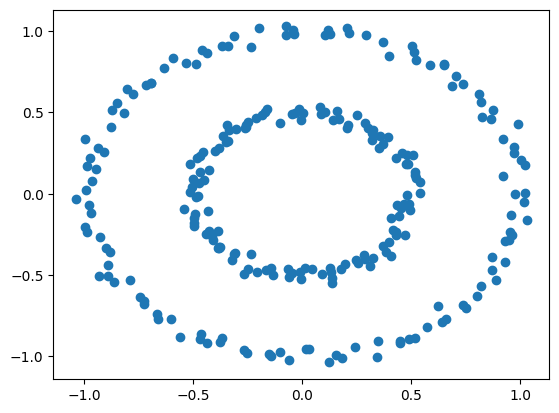

In [27]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

n_samples=250
noisy_moons = datasets.make_circles(n_samples=n_samples, noise=.03,factor=0.5)
X = noisy_moons[0]
plt.scatter(X[:,0], X[:,1])
plt.show()

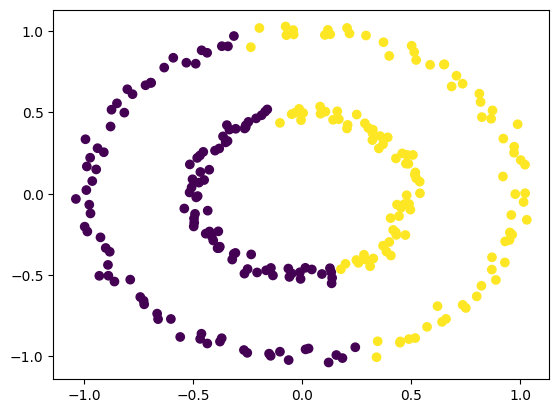

In [28]:
from sklearn.cluster import KMeans

kmeans =  KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=kmeans_labels)
plt.show()

Not so great. Let us check the **Silhouette Score** for these clusters

In [29]:
from sklearn import metrics
metrics.silhouette_score(X, kmeans_labels)

0.35009109079131634

Note that the **Silhouette Score** is not as bad as the clusters made. Let us apply DBSCAN and validate it

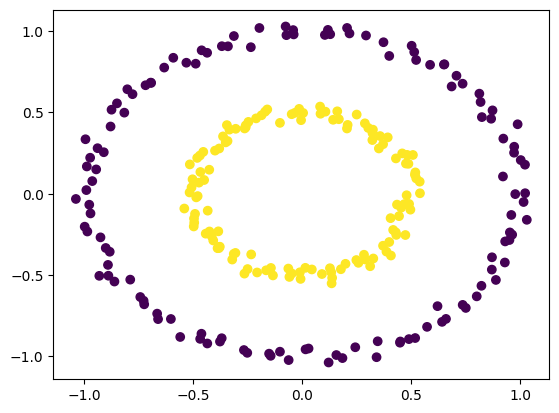

In [30]:
from sklearn import cluster

dbscanner = cluster.DBSCAN(eps=0.3, min_samples=20)
dbscan_labels = dbscanner.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=dbscan_labels)

### Validating the above clusters

**Silhouette Score**

In [31]:
metrics.silhouette_score(X, dbscan_labels)

0.1108223479779421

## Applying DBCV

In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming X is your dataset and kmeans_labels, dbscan_labels are clustering labels
# Calculate Silhouette Scores
kmeans_silhouette_score = silhouette_score(X, kmeans_labels, metric='euclidean')
dbscan_silhouette_score = silhouette_score(X, dbscan_labels, metric='euclidean')

# Calculate Davies-Bouldin Index
kmeans_davies_bouldin_score = davies_bouldin_score(X, kmeans_labels)
dbscan_davies_bouldin_score = davies_bouldin_score(X, dbscan_labels)

# Print results
print('KMeans Silhouette Score:', kmeans_silhouette_score)
print('DBSCAN Silhouette Score:', dbscan_silhouette_score)

print('KMeans Davies-Bouldin Score:', kmeans_davies_bouldin_score)
print('DBSCAN Davies-Bouldin Score:', dbscan_davies_bouldin_score)



KMeans Silhouette Score: 0.35009109079131634
DBSCAN Silhouette Score: 0.1108223479779421
KMeans Davies-Bouldin Score: 1.1864453473744077
DBSCAN Davies-Bouldin Score: 271.2291769557932
